<a href="https://colab.research.google.com/github/Aaryan-Joshi-19/Tarzan/blob/main/Yolo_Obj_Classification_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Image3.jpg to Image3 (1).jpg

0: 480x640 10 cars, 10 trucks, 202.4ms
Confidence ---> 0.84
Class name --> truck
Confidence ---> 0.81
Class name --> car
Confidence ---> 0.76
Class name --> truck
Confidence ---> 0.74
Class name --> car
Confidence ---> 0.73
Class name --> car
Confidence ---> 0.71
Class name --> car
Confidence ---> 0.69
Class name --> truck
Confidence ---> 0.68
Class name --> car
Confidence ---> 0.68
Class name --> truck
Confidence ---> 0.57
Class name --> truck
Confidence ---> 0.57
Class name --> car
Confidence ---> 0.57
Class name --> truck
Confidence ---> 0.54
Class name --> truck
Confidence ---> 0.54
Class name --> truck
Confidence ---> 0.51
Class name --> car
Confidence ---> 0.45
Class name --> car
Confidence ---> 0.33
Class name --> truck
Confidence ---> 0.31
Class name --> car
Confidence ---> 0.26
Class name --> car
Confidence ---> 0.26
Class name --> truck
Speed: 5.2ms preprocess, 202.4ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


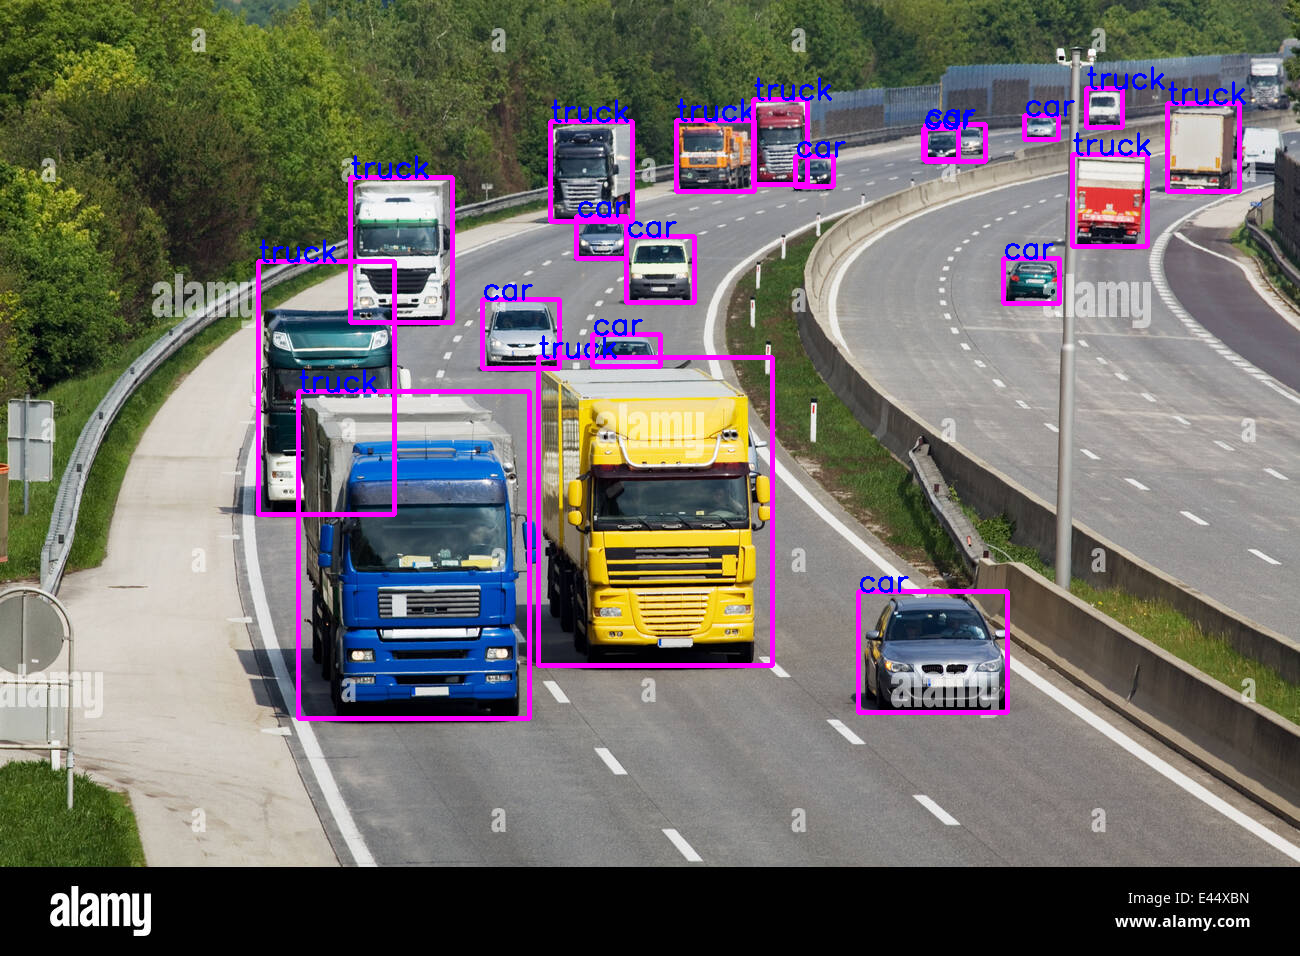

In [18]:
from ultralytics import YOLO
import cv2
import math
from google.colab.patches import cv2_imshow  # Import the cv2_imshow function
from google.colab import files  # Import to upload files

# Upload an image
uploaded = files.upload()  # <<<<--- Highlighted: Upload image here
image_path = list(uploaded.keys())[0]

# Load the image
img = cv2.imread(image_path)

# Load YOLO model
model = YOLO("yolo-Weights/yolov8n.pt")

# Object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"]

# Process the uploaded image
results = model(img, stream=True)  # Get results from YOLO model

# Coordinates and object detection
for r in results:
    boxes = r.boxes

    for box in boxes:
        # Bounding box coordinates
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to int values

        # Draw bounding box on image
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

        # Confidence
        confidence = math.ceil((box.conf[0] * 100)) / 100
        print("Confidence --->", confidence)

        # Class name
        cls = int(box.cls[0])
        print("Class name -->", classNames[cls])

        # Put class name and confidence on the image
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2

        cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

# Display the image using cv2_imshow for Colab
cv2_imshow(img)
